# Illustration explaing what PV perturbation fields are

### Perturbation = Total - Basic

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib import rc
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [11]:
def open_ncfile(f):
    
    ds = xr.open_dataset(f)
    pv = ds['pv']
    psi = ds['psi']
    h = ds['h']
    time = ds['time']
    lat = ds['lat']
    lon = ds['lon']
    lev = ds['lev']
    
    
    return pv,h,psi,time,lat,lon,lev

def setup_m(ax):
    
#     ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.add_feature(cfeature.COASTLINE)
#     t1 = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
#     t1.xlabels_top = False
#     t1.ylabels_right = False

    return ax

In [12]:
# global params
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# # for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
large = 28; med = 24; small = 20
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (8, 4),
          'axes.labelsize': small,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': med,
          'axes.titlepad': 10,
         'axes.facecolor': 'black'} #For electric background plots
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True


## Plot total, basic and perturbation streamfunction or geopotential plots

Pick time related to what we are investigating: 0917 18Z

In [13]:
root = '/archive/twb/pv_inversion/'
models = ['GFS']
dd = '20170917'
hh = '00'
tags = ['pv2','pvb','sqinvph']
tags_name = ['Total','Basic','Perturbation']

for model in models:
    f = root + model + '/' + dd + hh + '/' + dd + '_' + hh +'Z_pv2.nc'
    

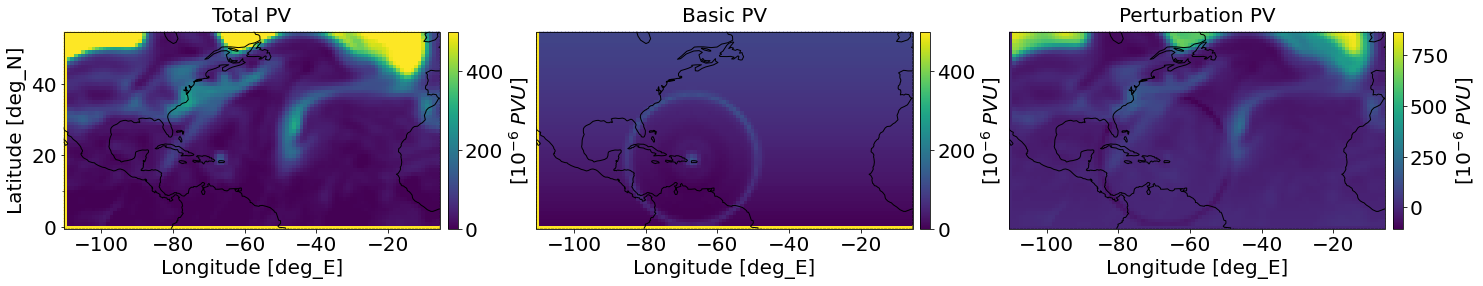

In [36]:
label = '$[10^{-6} \; PVU]$'

level = 250
# $\dfrac{m^2}{s}$ 
t = 15
############ total
fig = plt.figure(figsize=(24,12))
# ax = fig.add_subplot(111)
gs = gridspec.GridSpec(ncols=3,nrows=1)

############### total 
ax1 = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())
# ax = fig.add_axes([0.1,0.1,0.8,0.8])
m1 = setup_m(ax1)

f = root + model + '/' + dd + hh + '/' + dd + '_' + hh +'Z_pv2.nc'
pv,h,psi,time,lat,lon,lev = open_ncfile(f);

tmp = plt.pcolor(lon,lat,pv[t,int(np.where(lev==level)[0]),:,:])
plt.clim(0,500)
plt.colorbar(tmp,label=label, fraction=0.025, pad = 0.02)


xticks = np.arange(lon[0],lon[-1],10)
yticks = np.arange(lat[0],lat[-1],10)
m1.set_xticks(np.arange(0,20,10),[xticks])
m1.set_yticks(np.arange(0,20,10),[yticks])

plt.title('Total PV')
m1.set_extent([lon[0],lon[-1],lat[0],lat[-1]],crs=ccrs.PlateCarree())
# plt.set_cmap('nipy_spectral')

plt.xlabel('Longitude [deg_E]')
plt.ylabel('Latitude [deg_N]')
# ############# basic
ax2 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree())
m2 = setup_m(ax2)

f = root + model + '/' + dd + hh + '/' + dd + '_' + hh +'Z_pvb.nc'
pv,h,psi,time,lat,lon,lev = open_ncfile(f);

xticks = np.arange(lon[0],lon[-1],10)
yticks = np.arange(lat[0],lat[-1],10)
m2.set_xticks(np.arange(0,20,10),[xticks])
# m2.set_yticks(np.arange(0,20,10),[yticks])

tmp = plt.pcolor(lon,lat,pv[t,int(np.where(lev==level)[0]),:,:])
plt.clim(0,500)

plt.colorbar(tmp,label=label, fraction=0.025, pad = 0.02)
plt.title('Basic PV')
m2.set_extent([lon[0],lon[-1],lat[0],lat[-1]],crs=ccrs.PlateCarree())

plt.xlabel('Longitude [deg_E]')
plt.ylabel('Latitude [deg_N]')

# # ################ perturbation
ax3 = fig.add_subplot(gs[0,2],projection=ccrs.PlateCarree())
m3 = setup_m(ax3)

f = root + model + '/' + dd + hh + '/' + dd + '_' + hh +'Z_sqinvph.nc'
pv,h,psi,time,lat,lon,lev = open_ncfile(f);

xticks = np.arange(lon[0],lon[-1],10)
yticks = np.arange(lat[0],lat[-1],10)
m3.set_xticks(np.arange(0,20,10),[xticks])
# m3.set_yticks(np.arange(0,20,10),[yticks])

tmp = plt.pcolor(lon,lat,pv[t,int(np.where(lev==level)[0]),:,:])
# plt.clim(-300,100)
plt.colorbar(tmp,label=label, fraction=0.025, pad = 0.02)
plt.xlabel('Longitude [deg_E]')
plt.ylabel('Latitude [deg_N]')
plt.title('Perturbation PV')
m3.set_extent([lon[0],lon[-1],lat[0],lat[-1]],crs=ccrs.PlateCarree())


# fig.tight_layout()
# plt.show()
# fig.subplots_adjust(hspace=1) # doesnt work makes it worse
pathname = '/home/twb/tmp/perturbation_illustration.png'
# plt.savefig(pathname,dpi=1000,bbox_inches='tight')

In [ ]:
pv,h,psi,time,lat,lon,lev = open_ncfile(f);


# Plot streamlines

In [ ]:
pv

In [ ]:
root = '/archive/twb/pv_inversion/'
models = ['GFS']
dd = '20170917'
hh = '00'
f = root + models[0] + '/' + dd + hh + '/' + dd + '_' + hh +'Z_sqinvph.nc'

ds = xr.open_dataset(f)
lon = ds['lon']
lat = ds['lat']
lev = ds['lev']
time = ds['time']
u = ds['u']
v = ds['v']
psi = ds['psi']

In [ ]:
# X, Y = np.meshgrid(lon,lat)

# plot velocity field
# uvel, lonu = add_cyclic_point(ds.u, coord=ds.lon)
# vvel, lonv = add_cyclic_point(ds.v, coord=ds.lon)
X,Y = np.meshgrid(lon,lat)
# lonu = np.where(lonu>=180.,lonu-360.,lonu)
# U = -1 - lonu**2 + lonv



In [ ]:
# https://ncar-hackathons.github.io/visualization/examples/example-Streamlines.html
# https://github.com/SciTools/cartopy/issues/1388
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
fig = plt.figure(figsize=(24,12))
gs = gridspec.GridSpec(ncols=1,nrows=1)



ax1 = fig.add_subplot(gs[0,0])
# m1 = setup_m(ax1)


t=3
# plt.streamplot(X,Y,u[0,0,:,:],v[0,0,:,:],integration_direction='backward')
# plt.pcolor(lon,lat,psi[5,int(np.where(lev==500)[0]),:,:],cmap='twilight')
# xd = plt.streamplot(lonu, ds.lat,uvel[t,int(np.where(lev==500)[0]),:,:],vvel[t,int(np.where(lev==500)[0]),:,:],
#                density=5,linewidth=0.4,arrowsize=1,transform=ccrs.PlateCarree())
plt.streamplot(X,Y,u[t,int(np.where(lev==500)[0]),:,:],v[t,int(np.where(lev==500)[0]),:,:],
               density=1,linewidth=0.4,color=Y,cmap='gist_ncar')
# cmap = turbo 
# m1.set_extent([lon[0],lon[-1],lat[0],lat[-1]],crs=ccrs.PlateCarree())

# plt.savefig('/home/twb/tmp/streamlines2.png',dpi=1000,bbox_inches='tight')